In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a lsit
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)







635

In [5]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=33dd187f5ba605b188e3bc72d598fbf0


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping..." + city.title())
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")







Processing Record 1 of Set 1 | saquarema
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | santo antonio do ica
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | yar-sale
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | mahon
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | chitaga
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...Taolanaro
Processing Record 13 of Set 1 | dhidhdhoo
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | willmar
Processing Record 17 of Set 1 | lolua
City not found. Skipping...Lolua
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | quincy
Processing Record 20 of Set 1 | imbituba
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of

Processing Record 35 of Set 4 | chuy
Processing Record 36 of Set 4 | namibe
Processing Record 37 of Set 4 | bull savanna
Processing Record 38 of Set 4 | byron bay
Processing Record 39 of Set 4 | cururupu
Processing Record 40 of Set 4 | whitianga
Processing Record 41 of Set 4 | kashira
Processing Record 42 of Set 4 | hami
Processing Record 43 of Set 4 | oranjestad
Processing Record 44 of Set 4 | chumikan
Processing Record 45 of Set 4 | yerbogachen
Processing Record 46 of Set 4 | shenkursk
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | bokoro
Processing Record 49 of Set 4 | el alto
Processing Record 50 of Set 4 | guanica
Processing Record 1 of Set 5 | sobolevo
Processing Record 2 of Set 5 | beoumi
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | santiago del estero
Processing Record 5 of Set 5 | erhlin
City not found. Skipping...Erhlin
Processing Record 6 of Set 5 | ngunguru
Processing Record 7 of Set 5 | motema
Processing Record 8 of Set

Processing Record 24 of Set 8 | souillac
Processing Record 25 of Set 8 | cayenne
Processing Record 26 of Set 8 | colares
Processing Record 27 of Set 8 | uige
Processing Record 28 of Set 8 | amderma
City not found. Skipping...Amderma
Processing Record 29 of Set 8 | kokopo
Processing Record 30 of Set 8 | barentsburg
City not found. Skipping...Barentsburg
Processing Record 31 of Set 8 | indergarh
Processing Record 32 of Set 8 | san patricio
Processing Record 33 of Set 8 | urengoy
Processing Record 34 of Set 8 | peddapalli
Processing Record 35 of Set 8 | tubruq
City not found. Skipping...Tubruq
Processing Record 36 of Set 8 | rancho palos verdes
Processing Record 37 of Set 8 | bilma
Processing Record 38 of Set 8 | ostrovskoye
Processing Record 39 of Set 8 | pinsk
Processing Record 40 of Set 8 | artyk
City not found. Skipping...Artyk
Processing Record 41 of Set 8 | peyima
Processing Record 42 of Set 8 | acapulco
Processing Record 43 of Set 8 | taltal
Processing Record 44 of Set 8 | tarauaca

Processing Record 5 of Set 12 | arona
Processing Record 6 of Set 12 | san andres
Processing Record 7 of Set 12 | abalak
Processing Record 8 of Set 12 | burns lake
Processing Record 9 of Set 12 | la rioja
Processing Record 10 of Set 12 | okato
Processing Record 11 of Set 12 | tabou
Processing Record 12 of Set 12 | marovoay
Processing Record 13 of Set 12 | hino
Processing Record 14 of Set 12 | port moresby
Processing Record 15 of Set 12 | opuwo
Processing Record 16 of Set 12 | ulaangom
Processing Record 17 of Set 12 | xichang
Processing Record 18 of Set 12 | kotido
Processing Record 19 of Set 12 | vila
Processing Record 20 of Set 12 | nago
Processing Record 21 of Set 12 | lafiagi
Processing Record 22 of Set 12 | kurumkan
Processing Record 23 of Set 12 | tomatlan
Processing Record 24 of Set 12 | inhambane
Processing Record 25 of Set 12 | miri
Processing Record 26 of Set 12 | ambilobe
Processing Record 27 of Set 12 | aksarka
Processing Record 28 of Set 12 | kirakira
Processing Record 29 of

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saquarema,-22.9200,-42.5103,66.22,88,100,5.95,BR,2021-08-14 22:48:52
1,Qaanaaq,77.4840,-69.3632,40.78,98,100,0.58,GL,2021-08-14 22:48:52
2,Rikitea,-23.1203,-134.9692,74.46,82,38,18.84,PF,2021-08-14 22:48:53
3,Santo Antonio Do Ica,-3.1022,-67.9397,77.61,80,87,2.15,BR,2021-08-14 22:48:53
4,Ribeira Grande,38.5167,-28.7000,72.28,86,52,15.90,PT,2021-08-14 22:48:53
5,Yar-Sale,66.8333,70.8333,58.59,79,61,18.25,RU,2021-08-14 22:48:54
6,Hermanus,-34.4187,19.2345,52.90,79,0,11.48,ZA,2021-08-14 22:48:54
7,Mahon,39.8885,4.2658,79.36,100,0,4.61,ES,2021-08-14 22:48:54
8,Cape Town,-33.9258,18.4232,53.11,81,0,1.99,ZA,2021-08-14 22:46:45
9,Puerto Ayora,-0.7393,-90.3518,76.96,91,76,5.01,EC,2021-08-14 22:48:55


In [11]:
new_column_order = ["column2", "column4", "column1"]

In [12]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.sort_values(by=['Wind Speed'])

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
279,Havre-Saint-Pierre,CA,2021-08-14 22:50:19,50.2334,-63.5986,73.76,83,75,0.00
413,Floro,NO,2021-08-14 22:51:00,61.5996,5.0328,57.16,77,90,0.00
81,Nador,MA,2021-08-14 22:49:17,35.1740,-2.9287,75.27,94,90,0.00
255,Bukoba,TZ,2021-08-14 22:50:11,-1.3317,31.8122,72.54,57,91,0.56
1,Qaanaaq,GL,2021-08-14 22:48:52,77.4840,-69.3632,40.78,98,100,0.58
...,...,...,...,...,...,...,...,...,...
438,Inta,RU,2021-08-14 22:51:08,66.0317,60.1659,52.09,91,100,25.05
365,Muroto,JP,2021-08-14 22:50:45,33.2833,134.1500,80.64,93,100,26.24
561,Bandarbeyla,SO,2021-08-14 22:51:46,9.4942,50.8122,78.03,74,68,28.14
123,Sola,VU,2021-08-14 22:49:29,-13.8833,167.5500,77.92,77,94,28.23


In [13]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.sort_values(by=['Wind Speed'])

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
279,Havre-Saint-Pierre,CA,2021-08-14 22:50:19,50.2334,-63.5986,73.76,83,75,0.00
413,Floro,NO,2021-08-14 22:51:00,61.5996,5.0328,57.16,77,90,0.00
81,Nador,MA,2021-08-14 22:49:17,35.1740,-2.9287,75.27,94,90,0.00
255,Bukoba,TZ,2021-08-14 22:50:11,-1.3317,31.8122,72.54,57,91,0.56
1,Qaanaaq,GL,2021-08-14 22:48:52,77.4840,-69.3632,40.78,98,100,0.58
...,...,...,...,...,...,...,...,...,...
438,Inta,RU,2021-08-14 22:51:08,66.0317,60.1659,52.09,91,100,25.05
365,Muroto,JP,2021-08-14 22:50:45,33.2833,134.1500,80.64,93,100,26.24
561,Bandarbeyla,SO,2021-08-14 22:51:46,9.4942,50.8122,78.03,74,68,28.14
123,Sola,VU,2021-08-14 22:49:29,-13.8833,167.5500,77.92,77,94,28.23


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

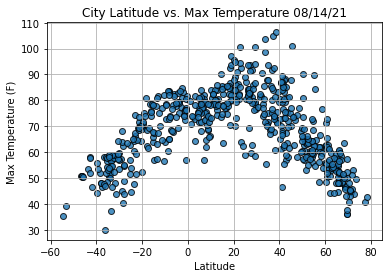

In [15]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig2.png'

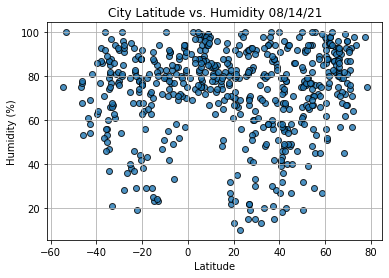

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig3.png'

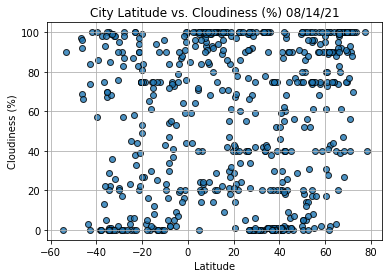

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig4.png'

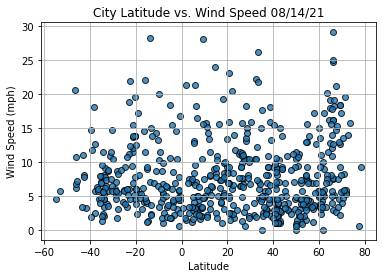

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Mahebourg
Country                        MU
Date          2021-08-14 22:48:56
Lat                      -20.4081
Lng                          57.7
Max Temp                    70.09
Humidity                       88
Cloudiness                     75
Wind Speed                   13.8
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
575    False
576     True
577     True
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2021-08-14 22:48:52,77.4840,-69.3632,40.78,98,100,0.58
4,Ribeira Grande,PT,2021-08-14 22:48:53,38.5167,-28.7000,72.28,86,52,15.90
5,Yar-Sale,RU,2021-08-14 22:48:54,66.8333,70.8333,58.59,79,61,18.25
7,Mahon,ES,2021-08-14 22:48:54,39.8885,4.2658,79.36,100,0,4.61
10,Chitaga,CO,2021-08-14 22:48:55,7.1378,-72.6646,56.95,98,99,2.33
...,...,...,...,...,...,...,...,...,...
574,Havoysund,NO,2021-08-14 22:51:50,70.9963,24.6622,45.48,76,93,5.91
576,Mana,GF,2021-08-14 22:51:51,5.6592,-53.7767,78.57,86,14,9.60
577,Sorland,NO,2021-08-14 22:51:51,67.6670,12.6934,51.71,79,47,21.12
578,Varkkallai,IN,2021-08-14 22:51:52,8.7341,76.7067,78.58,85,100,10.49


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]




,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2021-08-14 22:48:52,77.4840,-69.3632,40.78,98,100,0.58
4,Ribeira Grande,PT,2021-08-14 22:48:53,38.5167,-28.7000,72.28,86,52,15.90
5,Yar-Sale,RU,2021-08-14 22:48:54,66.8333,70.8333,58.59,79,61,18.25
7,Mahon,ES,2021-08-14 22:48:54,39.8885,4.2658,79.36,100,0,4.61
10,Chitaga,CO,2021-08-14 22:48:55,7.1378,-72.6646,56.95,98,99,2.33
...,...,...,...,...,...,...,...,...,...
574,Havoysund,NO,2021-08-14 22:51:50,70.9963,24.6622,45.48,76,93,5.91
576,Mana,GF,2021-08-14 22:51:51,5.6592,-53.7767,78.57,86,14,9.60
577,Sorland,NO,2021-08-14 22:51:51,67.6670,12.6934,51.71,79,47,21.12
578,Varkkallai,IN,2021-08-14 22:51:52,8.7341,76.7067,78.58,85,100,10.49


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]







In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
New
6:57
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: illegal target for annotation (<ipython-input-25-586aee058864>, line 5)

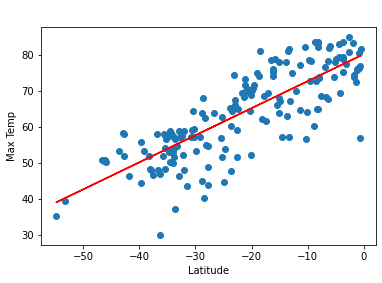

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

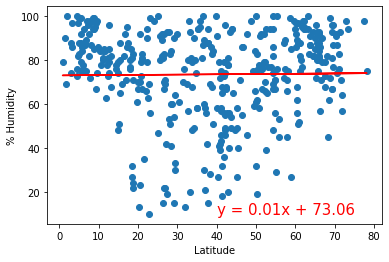

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

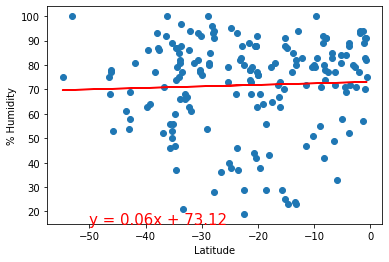

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))



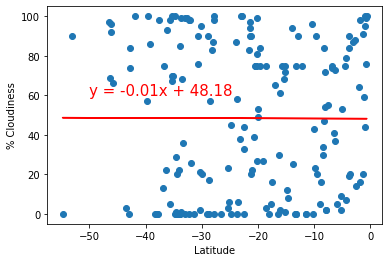

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

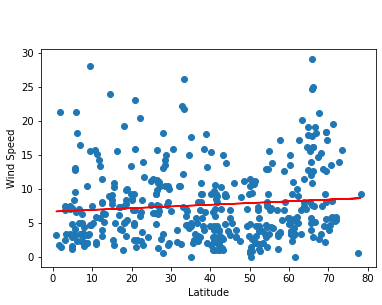

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

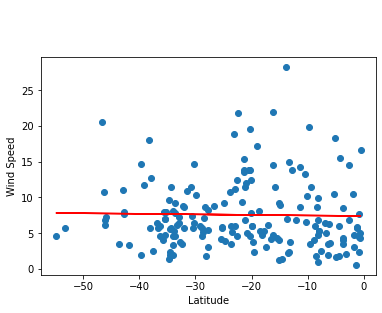

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))